In [1]:
!wget "https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png"
!mv "Lenna_(test_image).png" lena.png

--2025-12-12 22:47:35--  https://upload.wikimedia.org/wikipedia/en/7/7d/Lenna_%28test_image%29.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.153.240, 2620:0:860:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.153.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 473831 (463K) [image/png]
Saving to: ‘Lenna_(test_image).png’

Lenna_(test_image). 100%[===================>] 462.73K  2.45MB/s    in 0.2s    

2025-12-12 22:47:36 (2.45 MB/s) - ‘Lenna_(test_image).png’ saved [473831/473831]



1. RandomHorizontalFlip


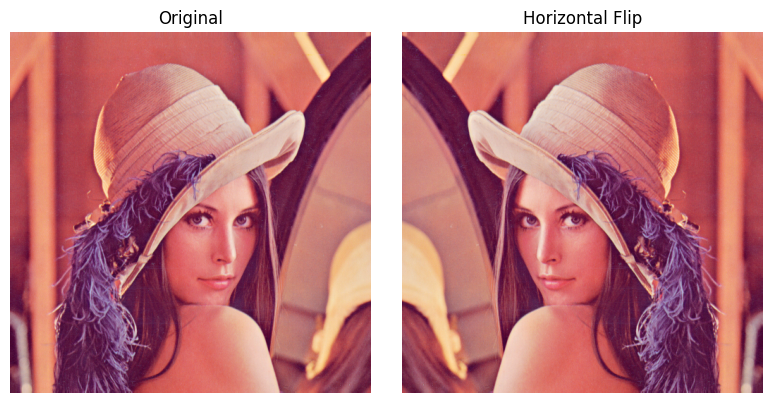


2. ColorJitter


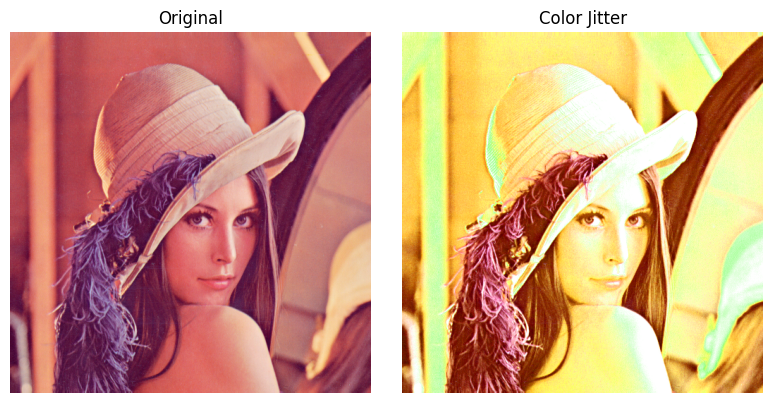


3. RandomRotation


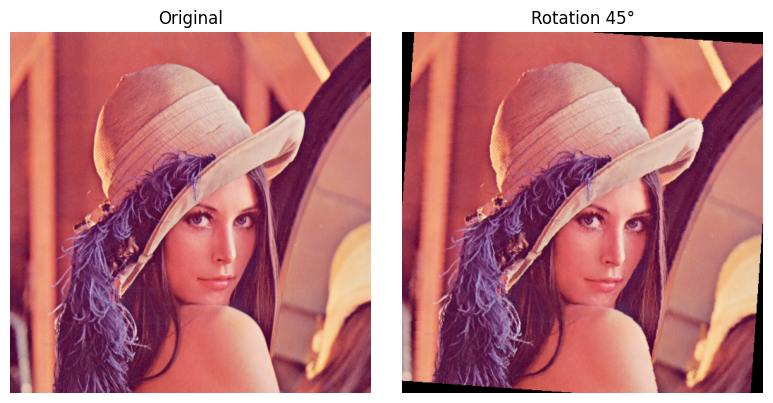


4. RandomAffine


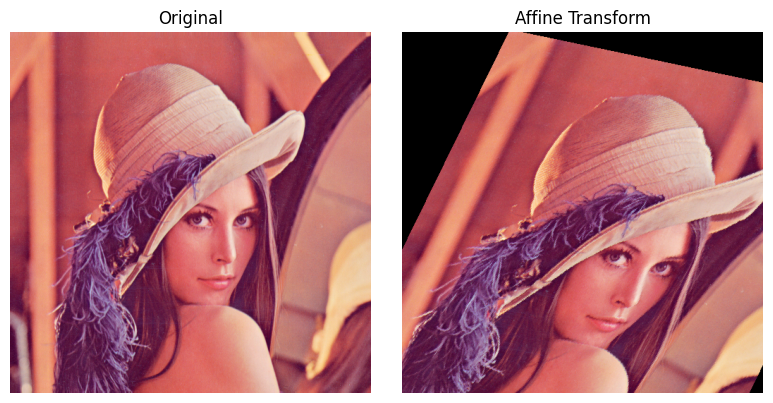


5. GaussianBlur


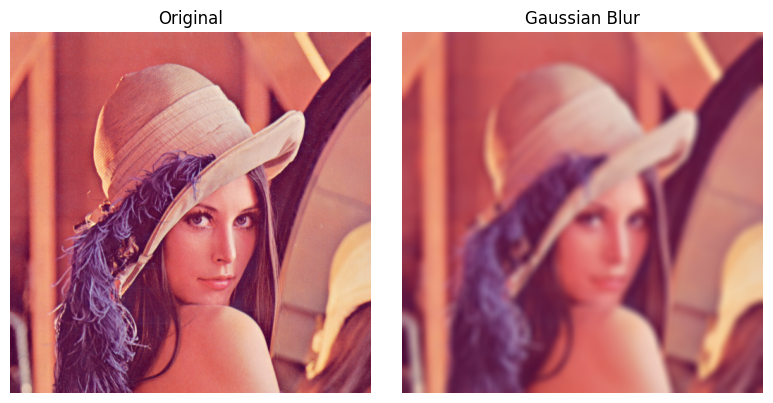


6. Комбинированный пайплайн


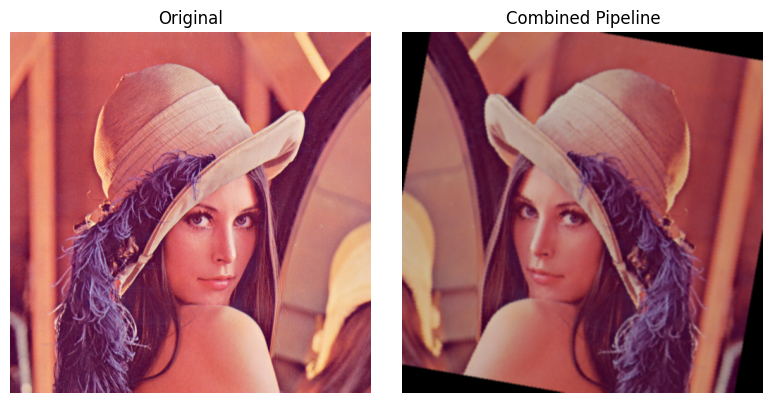

In [2]:
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

image = Image.open("lena.png").convert('RGB')

def show_comparison(original, transformed, title):
    fig, axes = plt.subplots(1, 2, figsize=(8, 4))
    axes[0].imshow(original)
    axes[0].set_title('Original')
    axes[0].axis('off')
    axes[1].imshow(transformed)
    axes[1].set_title(title)
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

print("1. RandomHorizontalFlip")
aug1 = transforms.RandomHorizontalFlip(p=1.0)
show_comparison(image, aug1(image), 'Horizontal Flip')

print("\n2. ColorJitter")
aug2 = transforms.ColorJitter(brightness=0.5, contrast=0.5, saturation=0.5, hue=0.3)
show_comparison(image, aug2(image), 'Color Jitter')

print("\n3. RandomRotation")
aug3 = transforms.RandomRotation(degrees=45)
show_comparison(image, aug3(image), 'Rotation 45°')

print("\n4. RandomAffine")
aug4 = transforms.RandomAffine(degrees=20, translate=(0.15, 0.15), scale=(0.8, 1.2), shear=15)
show_comparison(image, aug4(image), 'Affine Transform')

print("\n5. GaussianBlur")
aug5 = transforms.GaussianBlur(kernel_size=15, sigma=5.0)
show_comparison(image, aug5(image), 'Gaussian Blur')

print("\n6. Комбинированный пайплайн")
pipeline = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ColorJitter(brightness=0.3, contrast=0.3),
    transforms.RandomRotation(degrees=15),
    transforms.GaussianBlur(kernel_size=5, sigma=1.0)
])
show_comparison(image, pipeline(image), 'Combined Pipeline')

Выводы

В работе были применены пять аугментаций разных типов: геометрические (отражение, поворот, аффинные преобразования), цветовые (ColorJitter) и фильтрация (размытие).

Аугментации позволяют искусственно расширить обучающую выборку, создавая вариации исходных изображений. Это помогает модели лучше обобщаться и снижает риск переобучения.